# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Project 1 - Question 2
### By Mahsa Masoud and Omid Vaheb

##Importing Required Libraries

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10 as cifar
import numpy as np
import pandas as pd
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import cv2
import sys
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import optimizers

## Importing Dataset

In [ ]:
data = cifar.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

##Observing Dataset

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape
num_class = len(set(y_train))
print("Number Of Classes: ", num_class)

Number Of Classes:  10


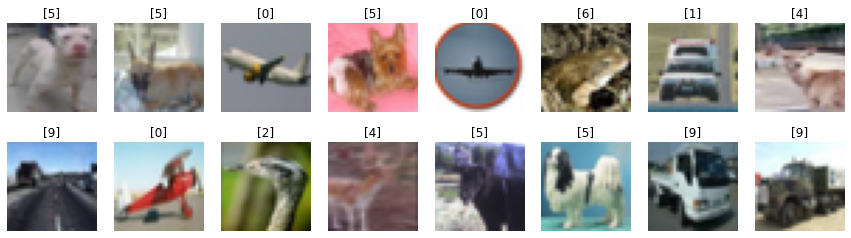

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title([y_train[random_index]])
plt.show()

## First Model

In [ ]:

model = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50 , batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 42s 6ms/step - loss: 1.7322 - accuracy: 0.3615 - val_loss: 1.2601 - val_accuracy: 0.5501
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0844 - accuracy: 0.6107 - val_loss: 0.9297 - val_accuracy: 0.6707
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8477 - accuracy: 0.6995 - val_loss: 0.8690 - val_accuracy: 0.6951
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7032 - accuracy: 0.7520 - val_loss: 0.8428 - val_accuracy: 0.7082
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5946 - accuracy: 0.7903 - val_loss: 0.7915 - val_accuracy: 0.7298
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5001 - accuracy: 0.8233 - val_loss: 0.7950 - val_accuracy: 0.7399
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4317 - accuracy: 0.8491 - val_loss: 0.8873 - val_accuracy

In [ ]:
history = r.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

In [ ]:
acc_val[-1]

0.7299000024795532

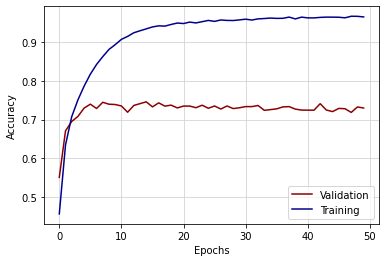

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

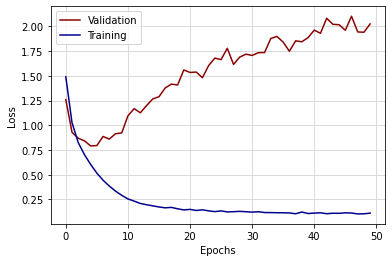

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.0253 - accuracy: 0.7299
Test score: 2.025273323059082
Test accuracy: 0.7299000024795532


## Second Model

In [ ]:
model2 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model2.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
r2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Epoch 1/30
391/391 [==============================] - 9s 20ms/step - loss: 1.8410 - accuracy: 0.3127 - val_loss: 1.1820 - val_accuracy: 0.5777
Epoch 2/30
391/391 [==============================] - 7s 18ms/step - loss: 1.0899 - accuracy: 0.6103 - val_loss: 0.9227 - val_accuracy: 0.6713
Epoch 3/30
391/391 [==============================] - 7s 18ms/step - loss: 0.7870 - accuracy: 0.7211 - val_loss: 0.7389 - val_accuracy: 0.7411
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 0.6162 - accuracy: 0.7850 - val_loss: 0.6630 - val_accuracy: 0.7685
Epoch 5/30
391/391 [==============================] - 7s 19ms/step - loss: 0.4917 - accuracy: 0.8309 - val_loss: 0.6479 - val_accuracy: 0.7839
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 0.3724 - accuracy: 0.8697 - val_loss: 0.6643 - val_accuracy: 0.7855
Epoch 7/30
391/391 [==============================] - 7s 19ms/step - loss: 0.2812 - accuracy: 0.9006 - val_loss: 0.7229 - val_accuracy: 0.7824

In [ ]:
history = r2.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

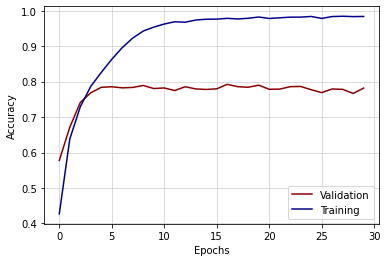

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
acc_val[-1]

0.7817999720573425

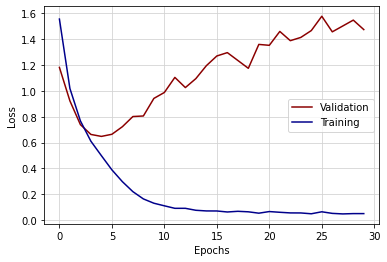

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4748 - accuracy: 0.7818
Test score: 1.4748064279556274
Test accuracy: 0.7817999720573425


## Model with 0 hidden layers

In [ ]:
model_0 = Sequential([Input(shape = X_train[0].shape) ,
                    Flatten(),
                    Dense(10, activation='softmax')])

In [ ]:
model_0.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r_0 = model_0.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size=128)

Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 2.0346 - accuracy: 0.2739 - val_loss: 1.8580 - val_accuracy: 0.3563
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 1.8386 - accuracy: 0.3561 - val_loss: 1.7927 - val_accuracy: 0.3733
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 1.8036 - accuracy: 0.3743 - val_loss: 1.8122 - val_accuracy: 0.3746
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 1.7793 - accuracy: 0.3855 - val_loss: 1.7714 - val_accuracy: 0.3904
Epoch 5/15
391/391 [==============================] - 1s 3ms/step - loss: 1.7590 - accuracy: 0.3947 - val_loss: 1.7738 - val_accuracy: 0.3808
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 1.7630 - accuracy: 0.3880 - val_loss: 1.7476 - val_accuracy: 0.3911
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 1.7450 - accuracy: 0.3931 - val_loss: 1.7977 - val_accuracy: 0.3782
Epoch 

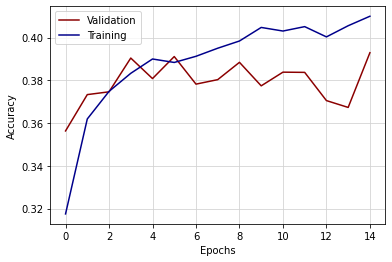

In [ ]:
history = r_0.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
print("Accuracy for test data: " , acc_val[-1])

Accuracy for test data:  0.3928999900817871


In [ ]:
score, acc = model_0.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7566 - accuracy: 0.3929
Test score: 1.7565834522247314
Test accuracy: 0.3928999900817871


# Model with 1 hidden layer

In [ ]:
model_1 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(32,(3,3), activation='relu',  padding="same" ),
                    Conv2D(64,(3,3), activation='relu',  padding="same" ),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_1.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                262160    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 281,722
Trainable params: 281,722
Non-trainable params: 0
________________________________________________

In [ ]:
r_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Epoch 1/30
391/391 [==============================] - 5s 11ms/step - loss: 2.0596 - accuracy: 0.2400 - val_loss: 1.5953 - val_accuracy: 0.4332
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.5210 - accuracy: 0.4459 - val_loss: 1.3851 - val_accuracy: 0.4873
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.3254 - accuracy: 0.5140 - val_loss: 1.2607 - val_accuracy: 0.5433
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1766 - accuracy: 0.5725 - val_loss: 1.1759 - val_accuracy: 0.5743
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 1.0789 - accuracy: 0.6099 - val_loss: 1.1497 - val_accuracy: 0.5857
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0332 - accuracy: 0.6252 - val_loss: 1.1033 - val_accuracy: 0.6066
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 0.9614 - accuracy: 0.6524 - val_loss: 1.0861 - val_accuracy: 0.6136

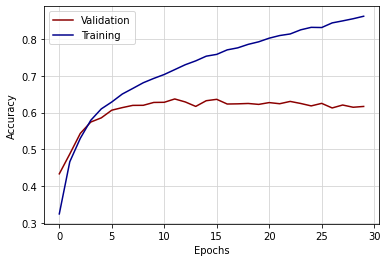

In [ ]:
history = r_1.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
print("Accuracy for test data: " , acc_val[-1])

Accuracy for test data:  0.6168000102043152


In [ ]:
score, acc = model_1.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.6059 - accuracy: 0.6168
Test score: 1.6059491634368896
Test accuracy: 0.6168000102043152


## Model with 2 hidden layers

In [ ]:
model_2 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(32,(3,3), activation='relu',  padding="same" ),
                    Conv2D(64,(3,3), activation='relu',  padding="same" ),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu',  padding="same" ),
                    Conv2D(128,(3,3), activation='relu',  padding="same" ),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_2.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)             

In [ ]:
r_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Epoch 1/30
391/391 [==============================] - 7s 16ms/step - loss: 1.8325 - accuracy: 0.3262 - val_loss: 1.2022 - val_accuracy: 0.5736
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 1.0897 - accuracy: 0.6135 - val_loss: 0.9310 - val_accuracy: 0.6722
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 0.8570 - accuracy: 0.7009 - val_loss: 0.8465 - val_accuracy: 0.7015
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 0.7379 - accuracy: 0.7426 - val_loss: 0.7873 - val_accuracy: 0.7300
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6331 - accuracy: 0.7788 - val_loss: 0.7401 - val_accuracy: 0.7489
Epoch 6/30
391/391 [==============================] - 6s 15ms/step - loss: 0.5560 - accuracy: 0.8048 - val_loss: 0.7176 - val_accuracy: 0.7543
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 0.4780 - accuracy: 0.8332 - val_loss: 0.7297 - val_accuracy: 0.7542

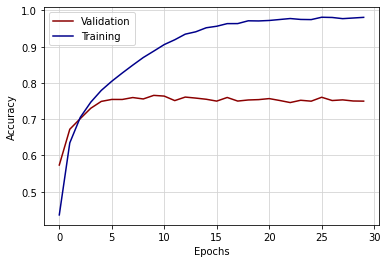

In [ ]:
history = r_2.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
print("Accuracy for test data: " , acc_val[-1])

Accuracy for test data:  0.7495999932289124


In [ ]:
score, acc = model_2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.7880 - accuracy: 0.7496
Test score: 1.7879760265350342
Test accuracy: 0.7495999932289124


## Model with ReLU as activation function

In [ ]:
model_relu = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    # Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_relu.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
r_relu = model_relu.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10 , batch_size=128)

Epoch 1/10
391/391 [==============================] - 16s 40ms/step - loss: 1.8003 - accuracy: 0.3335 - val_loss: 1.1756 - val_accuracy: 0.5858
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 1.0832 - accuracy: 0.6193 - val_loss: 0.9790 - val_accuracy: 0.6536
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.8139 - accuracy: 0.7138 - val_loss: 0.7652 - val_accuracy: 0.7340
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6307 - accuracy: 0.7821 - val_loss: 0.6764 - val_accuracy: 0.7659
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.5120 - accuracy: 0.8235 - val_loss: 0.6396 - val_accuracy: 0.7788
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 0.4116 - accuracy: 0.8568 - val_loss: 0.6213 - val_accuracy: 0.7952
Epoch 7/10
391/391 [==============================] - 15s 39ms/step - loss: 0.3162 - accuracy: 0.8895 - val_loss: 0.6893 - val_accuracy:

In [ ]:
history = r_relu.history
acc_val_relu = history['val_accuracy']
acc_tra_relu = history['accuracy']

## Model with Tanh as activation function

In [ ]:
model_tanh = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='tanh',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='tanh'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='tanh'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='tanh'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='tanh'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='tanh'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    # Dense(256, activation='tanh'),
                    Dense(10, activation='softmax')])

In [ ]:
model_tanh.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_tanh.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
r_tanh = model_tanh.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10 , batch_size=128)

Epoch 1/10
391/391 [==============================] - 17s 43ms/step - loss: 1.6351 - accuracy: 0.4153 - val_loss: 1.0350 - val_accuracy: 0.6468
Epoch 2/10
391/391 [==============================] - 17s 42ms/step - loss: 0.9509 - accuracy: 0.6713 - val_loss: 0.8812 - val_accuracy: 0.6994
Epoch 3/10
391/391 [==============================] - 17s 42ms/step - loss: 0.7444 - accuracy: 0.7449 - val_loss: 0.8440 - val_accuracy: 0.7149
Epoch 4/10
391/391 [==============================] - 17s 42ms/step - loss: 0.6003 - accuracy: 0.7915 - val_loss: 0.8312 - val_accuracy: 0.7264
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.4773 - accuracy: 0.8362 - val_loss: 0.8769 - val_accuracy: 0.7276
Epoch 6/10
391/391 [==============================] - 16s 42ms/step - loss: 0.3757 - accuracy: 0.8703 - val_loss: 0.9408 - val_accuracy: 0.7256
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2928 - accuracy: 0.8998 - val_loss: 0.9142 - val_accuracy:

In [ ]:
history = r_tanh.history
acc_val_tanh = history['val_accuracy']
acc_tra_tanh = history['accuracy']

## Model with Sigmoid as activation function

In [ ]:
model_sigmoid = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='sigmoid',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='sigmoid'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='sigmoid'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='sigmoid'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='sigmoid'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='sigmoid'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    # Dense(256, activation='sigmoid'),
                    Dense(10, activation='softmax')])

In [ ]:
model_sigmoid.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_sigmoid.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
r_sigmoid = model_sigmoid.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10 , batch_size=128)

Epoch 1/10
391/391 [==============================] - 17s 43ms/step - loss: 2.3929 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 16s 42ms/step - loss: 2.3028 - accuracy: 0.1033 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 16s 42ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 17s 43ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy:

In [ ]:
history = r_sigmoid.history
acc_val_sigmoid = history['val_accuracy']
acc_tra_sigmoid = history['accuracy']

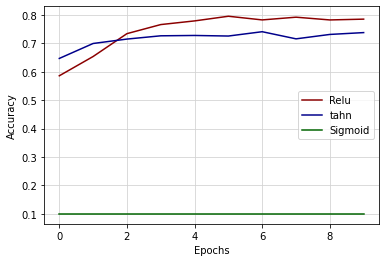

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val_relu, 'darkred')
plt.plot(acc_val_tanh, 'darkblue')
plt.plot(acc_val_sigmoid, 'darkgreen')
plt.legend(['Relu','tahn','Sigmoid'])
plt.grid(c='lightgrey')
plt.show()

## Model with Gradient Descent as Optimization method

In [ ]:
model_gradient = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_gradient.compile(optimizer ='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_gradient.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
r_gradient = model_gradient.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10 , batch_size=128)

Epoch 1/10
391/391 [==============================] - 8s 18ms/step - loss: 2.2962 - accuracy: 0.1249 - val_loss: 2.1795 - val_accuracy: 0.1681
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 2.0904 - accuracy: 0.2353 - val_loss: 2.1526 - val_accuracy: 0.2498
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 1.9145 - accuracy: 0.3169 - val_loss: 1.7982 - val_accuracy: 0.3556
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 1.7726 - accuracy: 0.3683 - val_loss: 1.6422 - val_accuracy: 0.4172
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 1.6557 - accuracy: 0.4074 - val_loss: 1.5829 - val_accuracy: 0.4345
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 1.5514 - accuracy: 0.4465 - val_loss: 1.4670 - val_accuracy: 0.4771
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 1.4789 - accuracy: 0.4770 - val_loss: 1.5038 - val_accuracy: 0.4605

## Model with Adam as Optimization method

In [ ]:
model_adam = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_adam.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_adam.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 128)       

In [ ]:
r_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10 , batch_size=128)

Epoch 1/10
391/391 [==============================] - 8s 19ms/step - loss: 1.8365 - accuracy: 0.3213 - val_loss: 1.1546 - val_accuracy: 0.5814
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 1.0667 - accuracy: 0.6194 - val_loss: 0.9492 - val_accuracy: 0.6644
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 0.8143 - accuracy: 0.7161 - val_loss: 0.7922 - val_accuracy: 0.7258
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.6532 - accuracy: 0.7699 - val_loss: 0.7223 - val_accuracy: 0.7479
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 0.5197 - accuracy: 0.8186 - val_loss: 0.6992 - val_accuracy: 0.7667
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.4170 - accuracy: 0.8540 - val_loss: 0.7018 - val_accuracy: 0.7714
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 0.3167 - accuracy: 0.8900 - val_loss: 0.6866 - val_accuracy: 0.7847

In [ ]:
history = r_gradient.history
acc_val_grad = history['val_accuracy']
acc_tra_grad = history['accuracy']

history = r_adam.history
acc_val_adam = history['val_accuracy']
acc_tra_adam = history['accuracy']

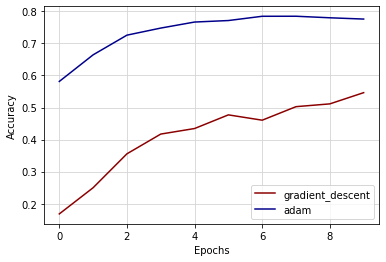

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val_grad, 'darkred')
plt.plot(acc_val_adam, 'darkblue')
plt.legend(['gradient_descent','adam'])
plt.grid(c='lightgrey')
plt.show()

## Model with 10% of data

In [ ]:
import numpy as np

p0=p1=p2=p3=p4=p5=p6=p7=p8=p9=j=i=0
X_train_600=np.zeros((6000,32,32,3))
y_train_600=np.zeros((6000,1))
for i in range(len(y_train)):
    if j<6000:
        if y_train[i]==0:
            if p0<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p0=p0+1
        if y_train[i]==1:
            if p1<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p1=p1+1
        if y_train[i]==2:
            if p2<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p2=p2+1
        if y_train[i]==3:
            if p3<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p3=p3+1
        if y_train[i]==4:
            if p4<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p4=p4+1
        if y_train[i]==5:
            if p5<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p5=p5+1
        if y_train[i]==6:
            if p6<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p6=p6+1
        if y_train[i]==7:
            if p7<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p7=p7+1
        if y_train[i]==8:
            if p8<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p8=p8+1
        if y_train[i]==9:
            if p9<600:
                X_train_600[j,:]=X_train[i,:]
                y_train_600[j]=y_train[i]
                j=j+1
                p9=p9+1
                

In [ ]:
# r2 = model2.fit(X_train_600, y_train_600, validation_data=(X_test, y_test), epochs=30 , batch_size=128)
r2 = model2.fit(X_train_600, y_train_600, validation_split=0.1, epochs=30 , batch_size=128)



Epoch 1/30
43/43 [==============================] - 5s 42ms/step - loss: 2.2777 - accuracy: 0.1381 - val_loss: 2.1067 - val_accuracy: 0.1917
Epoch 2/30
43/43 [==============================] - 1s 18ms/step - loss: 2.0070 - accuracy: 0.2644 - val_loss: 1.8617 - val_accuracy: 0.3000
Epoch 3/30
43/43 [==============================] - 1s 19ms/step - loss: 1.8163 - accuracy: 0.3154 - val_loss: 1.7457 - val_accuracy: 0.3517
Epoch 4/30
43/43 [==============================] - 1s 18ms/step - loss: 1.6571 - accuracy: 0.3901 - val_loss: 1.6473 - val_accuracy: 0.4167
Epoch 5/30
43/43 [==============================] - 1s 18ms/step - loss: 1.5032 - accuracy: 0.4488 - val_loss: 1.5254 - val_accuracy: 0.4450
Epoch 6/30
43/43 [==============================] - 1s 18ms/step - loss: 1.4408 - accuracy: 0.4714 - val_loss: 1.4928 - val_accuracy: 0.4283
Epoch 7/30
43/43 [==============================] - 1s 19ms/step - loss: 1.3314 - accuracy: 0.5116 - val_loss: 1.2900 - val_accuracy: 0.5100
Epoch 8/30
43

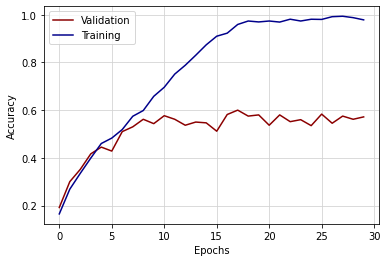

In [ ]:
history = r2.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

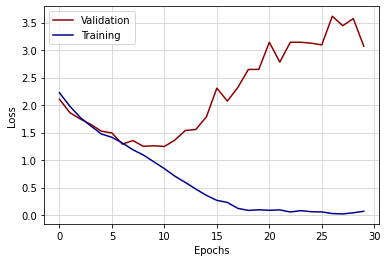

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 2s 4ms/step - loss: 3.1441 - accuracy: 0.5456
Test score: 3.1441333293914795
Test accuracy: 0.5455999970436096


## Model with a bigger kernel instead of two smaller ones

In [ ]:
model_one_layer = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (6,6), activation='relu',  padding="same" ),
                
                    MaxPooling2D(2,2),
                    
                    Conv2D(filters =64,kernel_size =(6,6), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                   
                    Conv2D(filters =128,kernel_size =(6,6),  padding="same" ,activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_one_layer.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_one_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        3488      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         295040    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
r_one_layer = model_one_layer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20 , batch_size=128)

Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 1.7583 - accuracy: 0.3546 - val_loss: 1.1907 - val_accuracy: 0.5702
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1387 - accuracy: 0.5972 - val_loss: 1.1128 - val_accuracy: 0.5986
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9166 - accuracy: 0.6779 - val_loss: 0.9605 - val_accuracy: 0.6587
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7385 - accuracy: 0.7409 - val_loss: 0.8643 - val_accuracy: 0.7019
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.6153 - accuracy: 0.7848 - val_loss: 0.8366 - val_accuracy: 0.7179
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.5016 - accuracy: 0.8244 - val_loss: 0.8287 - val_accuracy: 0.7257
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.3871 - accuracy: 0.8658 - val_loss: 0.9510 - val_accuracy: 0.7041

In [ ]:
history = r_one_layer.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

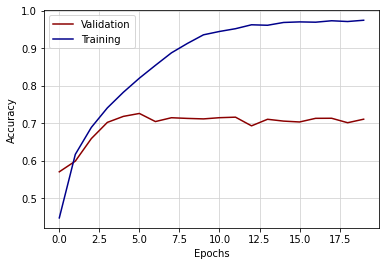

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

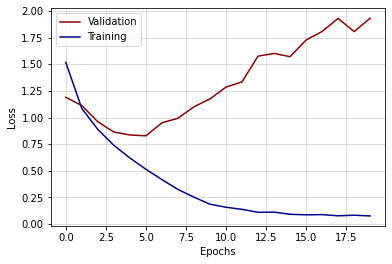

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model_one_layer.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.9329 - accuracy: 0.7104
Test score: 1.9328805208206177
Test accuracy: 0.7103999853134155


In [ ]:
acc_val[-1]

0.7087000012397766

## Model with 0.25 Dropout

In [ ]:
model_drop = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.25) , 
                     
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.25) , 
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.25) , 

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model_drop.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

In [ ]:
r_drop= model_drop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Epoch 1/30
391/391 [==============================] - 42s 22ms/step - loss: 1.8743 - accuracy: 0.2980 - val_loss: 1.2122 - val_accuracy: 0.5562
Epoch 2/30
391/391 [==============================] - 7s 19ms/step - loss: 1.1663 - accuracy: 0.5812 - val_loss: 1.0661 - val_accuracy: 0.6264
Epoch 3/30
391/391 [==============================] - 7s 19ms/step - loss: 0.9307 - accuracy: 0.6718 - val_loss: 0.8243 - val_accuracy: 0.7110
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 0.7652 - accuracy: 0.7313 - val_loss: 0.7438 - val_accuracy: 0.7431
Epoch 5/30
391/391 [==============================] - 8s 19ms/step - loss: 0.6636 - accuracy: 0.7686 - val_loss: 0.7075 - val_accuracy: 0.7545
Epoch 6/30
391/391 [==============================] - 8s 19ms/step - loss: 0.5849 - accuracy: 0.7959 - val_loss: 0.6460 - val_accuracy: 0.7792
Epoch 7/30
391/391 [==============================] - 8s 19ms/step - loss: 0.5148 - accuracy: 0.8182 - val_loss: 0.6188 - val_accuracy: 0.784

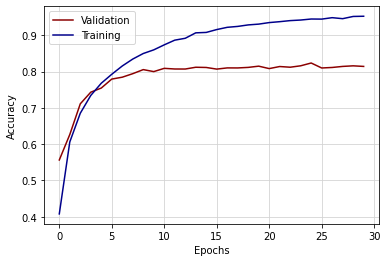

In [ ]:
history = r_drop.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

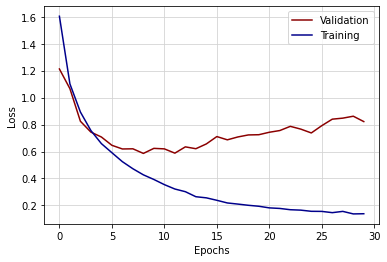

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

## Model with 0.5 Dropout

In [ ]:
model_drop_50 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                     
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

model_drop_50 .compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_drop_50 .summary()
r_drop_50= model_drop_50 .fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)        

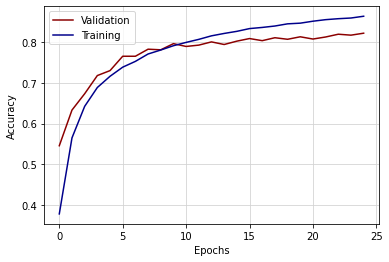

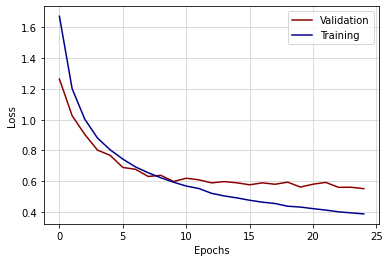

In [ ]:
history = r_drop_50.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()